In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.time import Time
from datetime import datetime, timedelta

In [3]:
def light_curve(low_path: str, high_path: str, unique_ids: list = None):

    low_df = pd.read_csv(low_path)
    high_df = pd.read_csv(high_path)
    if unique_ids == None:
        unique_ids = high_df['Source ID'].tolist()
    for source in unique_ids:
        plt.subplots()
        source_df = low_df[low_df['Source ID'] == source]
        fluxes = source_df['Flux Density']
        fluxes = [float(flux.replace('mJy', '')) for flux in fluxes]
        flux_errs = source_df['Flux Uncert']
        flux_errs = [float(err.replace('mJy', '')) for err in flux_errs]
        flux_unit = 'mJy'
        if max(fluxes) > 1000:
            flux_unit = 'Jy'
            for i in range(len(fluxes)):
                fluxes[i] /= 1000
                flux_errs[i] /= 1000
        date_times = source_df['Obs Date Time'].tolist()
        for i in range(len(date_times)):
            dt = date_times[i]
            m_end = dt.rindex(':')
            s_start = m_end + 1
            if dt[s_start:] == '60':
                dt = dt[:s_start] + '0'
                fmt = '%m-%d-%y %H:%M'
                date_times[i] = (datetime.strptime(dt[:m_end], fmt) + timedelta(minutes=1)).strftime('%m-%d-%y %H:%M:%S')

        fmt_str = '%m-%d-%y %H:%M:%S'
        date_times = [Time(datetime.strptime(dt, fmt_str), format='datetime', scale='utc').mjd for dt in date_times]

        freqs = source_df['Freq'].tolist()
        other = []
        small_milli = [] # 1.1mm
        large_milli = [] # 1.3mm
        micro = [] # 870µm
        for i in range(len(freqs)):
            if freqs[i] == 'Not found':
                other.append(i)
                pass
            else:
                try:
                    freqs[i] = float(freqs[i].replace('GHz', ''))
                    if freqs[i] > 260.69 and freqs[i] < 285.52: # 1.15-1.05mm
                        small_milli.append(i)
                    elif freqs[i] > 222.07 and freqs[i] < 239.83: # 1.35-1.25mm
                        large_milli.append(i)
                    elif freqs[i] > 340.67 and freqs[i] < 348.60: # 880-860µm
                        micro.append(i)
                    else:
                        other.append(i)
                except Exception as e:
                    print(f'Error while getting the frequencies for source {source}: {e}')
        other_dt = [date_times[a] for a in other]
        other_flx = [fluxes[a] for a in other]
        other_flx_err = [flux_errs[a] for a in other]
        sm_milli_dt = [date_times[b] for b in small_milli]
        sm_milli_flx = [fluxes[b] for b in small_milli]
        sm_milli_flx_err = [flux_errs[b] for b in small_milli]
        lg_milli_dt = [date_times[c] for c in large_milli]
        lg_milli_flx = [fluxes[c] for c in large_milli]
        lg_milli_flx_err = [flux_errs[c] for c in large_milli]
        micro_dt = [date_times[d] for d in micro]
        micro_flx = [fluxes[d] for d in micro]
        micro_flx_err = [flux_errs[d] for d in micro]

        plt.errorbar(sm_milli_dt, sm_milli_flx, yerr=sm_milli_flx_err, color='g', fmt='x', capsize=3, markersize=2,\
                    capthick=0.5, elinewidth=0.5, label='1.1mm')
        plt.errorbar(lg_milli_dt, lg_milli_flx, yerr=lg_milli_flx_err, color='r', fmt='x', capsize=3, markersize=2,\
                    capthick=0.5, elinewidth=0.5, label='1.3mm')
        plt.errorbar(micro_dt, micro_flx, yerr=micro_flx_err, color='b', fmt='x', capsize=3, markersize=2,\
                    capthick=0.5, elinewidth=0.5, label='870µm')
        plt.errorbar(other_dt, other_flx, yerr=other_flx_err, color='k', fmt='x', capsize=3, markersize=2,\
                    capthick=0.5, elinewidth=0.5, label='Other/not found')

        plt.title(f'Source {source[2:]}')
        plt.xlabel('Modified Julian Date')
        plt.ylabel(f'Flux [{flux_unit}]')
        plt.legend()
        plt.ylim(bottom=0)

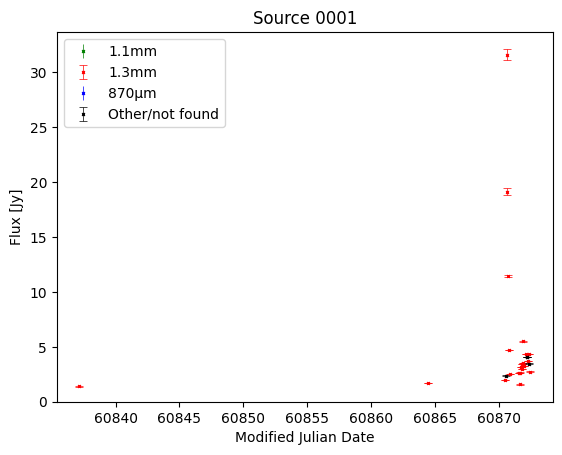

In [4]:
light_curve('./low_level.csv', './high_level.csv', unique_ids=['id0001'])

/var/folders/3j/z5bj43t10vsdnks2s1xw3vm80000gn/T/ipykernel_5561/2146645881.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_table('../flux_history/SMA_fluxhistory/2253+161_smafh.dat', comment='!', header=None, skipinitialspace=True,\


(0.0, 58.8466)

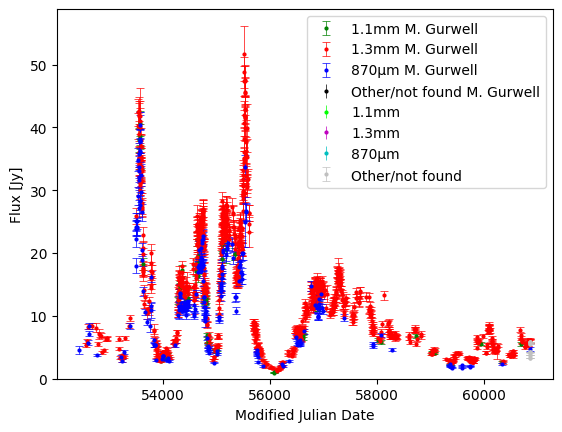

In [5]:
low_df = pd.read_csv('./low_level.csv')
high_df = pd.read_csv('./high_level.csv')

plt.plot()

##### M. Gurwell data #####
df = pd.read_table('../flux_history/SMA_fluxhistory/2253+161_smafh.dat', comment='!', header=None, skipinitialspace=True,\
                    sep=r'[\+/\- ]+',\
                    names=('Band', 'Day', 'Month', 'Year', 'Time', 'Obs', 'Freq (GHz)', 'Flux (Jy)', 'Error (Jy)', 'SNR', 'PI', 'MJD'))

fluxes = df['Flux (Jy)'].tolist()
flux_errs = df['Error (Jy)'].tolist()
date_times = df['MJD'].tolist()

band = df['Band'].tolist()
other = []
small_milli = [] # 1.1mm
large_milli = [] # 1.3mm
micro = [] # 870 µm
for i in range(len(band)):
    if band[i] == '870mi':
        micro.append(i)
    elif band[i] == '1.1mm':
        small_milli.append(i)
    elif band[i] == '1.3mm':
        large_milli.append(i)
    else:
        other.append(i)

other_dt = [date_times[a] for a in other]
other_flx = [fluxes[a] for a in other]
other_flx_err = [flux_errs[a] for a in other]
sm_milli_dt = [date_times[b] for b in small_milli]
sm_milli_flx = [fluxes[b] for b in small_milli]
sm_milli_flx_err = [flux_errs[b] for b in small_milli]
lg_milli_dt = [date_times[c] for c in large_milli]
lg_milli_flx = [fluxes[c] for c in large_milli]
lg_milli_flx_err = [flux_errs[c] for c in large_milli]
micro_dt = [date_times[d] for d in micro]
micro_flx = [fluxes[d] for d in micro]
micro_flx_err = [flux_errs[d] for d in micro]

plt.errorbar(sm_milli_dt, sm_milli_flx, yerr=sm_milli_flx_err, color='g', fmt='o', capsize=3, markersize=2,\
            capthick=0.5, elinewidth=0.5, label='1.1mm M. Gurwell')
plt.errorbar(lg_milli_dt, lg_milli_flx, yerr=lg_milli_flx_err, color='r', fmt='o', capsize=3, markersize=2,\
            capthick=0.5, elinewidth=0.5, label='1.3mm M. Gurwell')
plt.errorbar(micro_dt, micro_flx, yerr=micro_flx_err, color='b', fmt='o', capsize=3, markersize=2,\
            capthick=0.5, elinewidth=0.5, label='870µm M. Gurwell')
plt.errorbar(other_dt, other_flx, yerr=other_flx_err, color='k', fmt='o', capsize=3, markersize=2,\
            capthick=0.5, elinewidth=0.5, label='Other/not found M. Gurwell')

##### archive data #####

source_df = low_df[low_df['Source ID'] == 'id0015']
fluxes = source_df['Flux Density']
fluxes = [float(flux.replace('mJy', '')) for flux in fluxes]
flux_errs = source_df['Flux Uncert']
flux_errs = [float(err.replace('mJy', '')) for err in flux_errs]
flux_unit = 'mJy'
if max(fluxes) > 1000:
    flux_unit = 'Jy'
    for i in range(len(fluxes)):
        fluxes[i] /= 1000
        flux_errs[i] /= 1000
date_times = source_df['Obs Date Time'].tolist()
for i in range(len(date_times)):
    dt = date_times[i]
    m_end = dt.rindex(':')
    s_start = m_end + 1
    if dt[s_start:] == '60':
        dt = dt[:s_start] + '0'
        fmt = '%m-%d-%y %H:%M'
        date_times[i] = (datetime.strptime(dt[:m_end], fmt) + timedelta(minutes=1)).strftime('%m-%d-%y %H:%M:%S')

fmt_str = '%m-%d-%y %H:%M:%S'
date_times = [Time(datetime.strptime(dt, fmt_str), format='datetime', scale='utc').mjd for dt in date_times]

freqs = source_df['Freq'].tolist()
other = []
small_milli = [] # 1.1mm
large_milli = [] # 1.3mm
micro = [] # 870µm
for i in range(len(freqs)):
    if freqs[i] == 'Not found':
        other.append(i)
        pass
    else:
        try:
            freqs[i] = float(freqs[i].replace('GHz', ''))
            if freqs[i] > 260.69 and freqs[i] < 285.52: # 1.15-1.05mm
                small_milli.append(i)
            elif freqs[i] > 222.07 and freqs[i] < 239.83: # 1.35-1.25mm
                large_milli.append(i)
            elif freqs[i] > 340.67 and freqs[i] < 348.60: # 880-860µm
                micro.append(i)
            else:
                other.append(i)
        except Exception as e:
            print(f'Error while getting the frequencies for source: {e}')

other_dt = [date_times[a] for a in other]
other_flx = [fluxes[a] for a in other]
other_flx_err = [flux_errs[a] for a in other]
sm_milli_dt = [date_times[b] for b in small_milli]
sm_milli_flx = [fluxes[b] for b in small_milli]
sm_milli_flx_err = [flux_errs[b] for b in small_milli]
lg_milli_dt = [date_times[c] for c in large_milli]
lg_milli_flx = [fluxes[c] for c in large_milli]
lg_milli_flx_err = [flux_errs[c] for c in large_milli]
micro_dt = [date_times[d] for d in micro]
micro_flx = [fluxes[d] for d in micro]
micro_flx_err = [flux_errs[d] for d in micro]

plt.errorbar(sm_milli_dt, sm_milli_flx, yerr=sm_milli_flx_err, color='lime', fmt='o', capsize=3, markersize=2,\
            capthick=0.5, elinewidth=0.5, label='1.1mm')
plt.errorbar(lg_milli_dt, lg_milli_flx, yerr=lg_milli_flx_err, color='m', fmt='o', capsize=3, markersize=2,\
            capthick=0.5, elinewidth=0.5, label='1.3mm')
plt.errorbar(micro_dt, micro_flx, yerr=micro_flx_err, color='c', fmt='o', capsize=3, markersize=2,\
            capthick=0.5, elinewidth=0.5, label='870µm')
plt.errorbar(other_dt, other_flx, yerr=other_flx_err, color='silver', fmt='o', capsize=3, markersize=2,\
            capthick=0.5, elinewidth=0.5, label='Other/not found')

plt.xlabel('Modified Julian Date')
plt.ylabel(f'Flux [Jy]')
plt.legend()
plt.ylim(bottom=0)